# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2024-2
---
1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$
$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$
---

2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $ V(r) $ es el potencial en función de la distancia interatómica $ r $.
- $ \epsilon $ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $ \sigma $ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $ r $ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{2/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{2/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.


---
3.  El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres al español.


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.



El tiempo de colision es: 3.3333333333333335


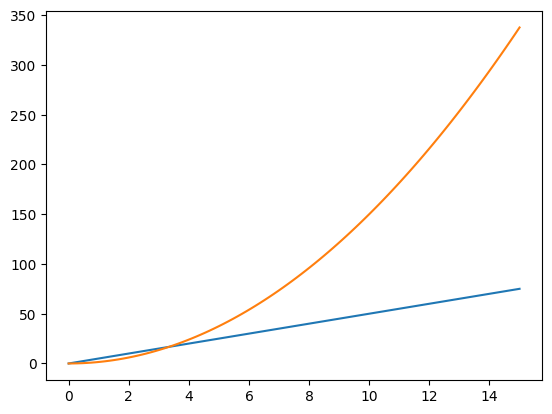

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def mua(v_m, a_p):
  t = np.linspace(0, 15, 100)
  x_fm =  [0]
  x_fp = [0]
  for i in range(1, len(t)):
      #usamos las ecuaciones de cinematica para encontrar  las posiciones a lo largo del tiempo
      position_p = (1/2)*(a_p*(t[i]**2))
      position_m = v_m*t[i]
      #agregamos las posiciones de los dos cuerpos
      x_fm.append(position_m)
      x_fp.append(position_p)
      if(np.abs(position_p - position_m) < 1e-2):
        print(f"El tiempo de colision es: {t[i]}")

  plt.plot(t, x_fm)
  plt.plot(t, x_fp)




mua(5.0, 3.0)

(-1.00000000000000, 1.1224620483093959)

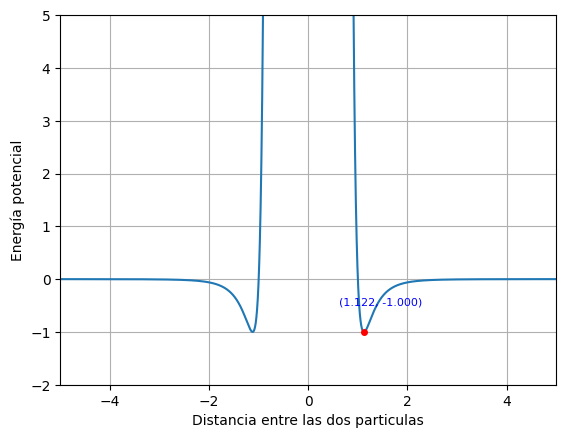

In [3]:
import sympy as sym
from scipy.optimize import bisect, brentq

def poten( e, o):
  r  = sym.symbols("r")
  v = 4*e*((o/r)**12 - (o/r)**6)
  vprime = sym.diff(v,r)
  vl = sym.lambdify(r,v)
  dvl = sym.lambdify(r,vprime)
  #Encontramos el radio minimo hayando  ceros de la derivada de la energía potencial
  rmin = brentq(dvl, 1/2, 2)
  ecu_new = v.subs(r, rmin)
  x = np.linspace(-10,10, 10000)
  plt.plot(x, vl(x))
  plt.xlabel("Distancia entre las dos particulas")
  plt.ylabel("Energía potencial")
  plt.plot(1.1224620483093959,-1, "ro", markersize=4)
  plt.annotate(f"({1.1224620483093959:.3f}, {-1:.3f})",
             xy=(1.1224620483093959, -1),
             xytext=(1.1224620483093959-0.5, -1+0.5), color='blue', fontsize=8)
  plt.axis([-5, 5, -2, 5])
  plt.grid(True)
  plt.show
  return ecu_new, rmin
poten(1,1)


In [104]:
#El sigma negativo no tiene interprestación fisica, entonces no tiene sentido poner -rm, adémas el potencial LJ depende directamente de sigma, por lo tanto no hay más valores de sigma
#que cumplan de manera coherente la fución de EPLJ además de sigma = 1.

In [4]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

In [21]:
income


,Country,Total Wealth (billions USD),GDP per Adult (USD),Wealth per Adult (USD),Share of World Wealth
0,United States,"$145,793","$91,340","$579,051",31.45%
1,China,"$85,107","$15,765","$76,639",18.36%
2,Japan,"$25,692","$45,449","$245,238",5.54%
3,Germany,"$17,489","$59,423","$256,985",3.77%
4,United Kingdom,"$16,261","$59,377","$309,375",3.51%
...,...,...,...,...,...
211,Anguilla,NaN,"$26,510",NaN,0%
212,Cook Islands,NaN,"$26,438",NaN,0%
213,Nauru,NaN,"$23,398",NaN,0%
214,Tuvalu,NaN,"$7,780",NaN,0%


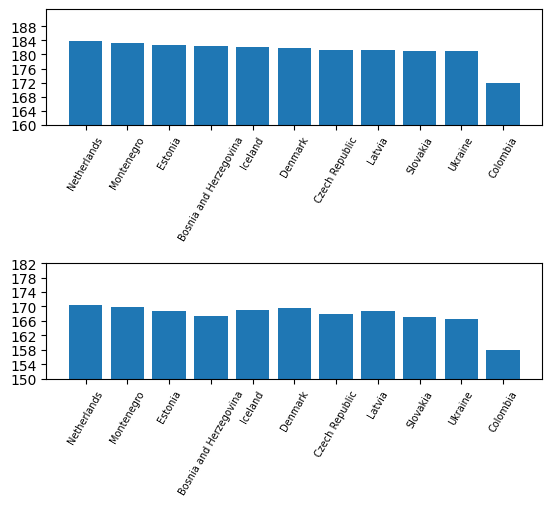

In [8]:
alturas
alturas_new = alturas.drop(["Girls 19 (in)", "Boys 19 (in)"], axis = 1)
alturas_new
alturas_up_M = alturas_new.sort_values("Average Height, Boys, 19 yo (cm)", ascending= False)
alturas_up_M = alturas_up_M[["Country","Average Height, Boys, 19 yo (cm)", "Girls 19 (cm)"]].head(10)
colombia_row = alturas_new[alturas_new['Country'] == 'Colombia']
alturas_up_M = pd.concat([alturas_up_M, colombia_row])
fig, axs = plt.subplots(2, 1)
axs[0].bar(alturas_up_M['Country'], alturas_up_M['Average Height, Boys, 19 yo (cm)'])
axs[0].tick_params(axis='x', labelsize=7, labelrotation=60)
axs[0].set_ylim(ymin=160)
axs[0].set_yticks(np.arange(160, 190, 4))
plt.subplots_adjust(hspace=1.2, wspace=0.3)

#Altura de mujeres
axs[1].bar(alturas_up_M['Country'], alturas_up_M['Girls 19 (cm)'])
axs[1].tick_params(axis='x', labelsize=7, labelrotation=60)
axs[1].set_ylim(ymin=160)
axs[1].set_yticks(np.arange(150, 185, 4))


plt.show()

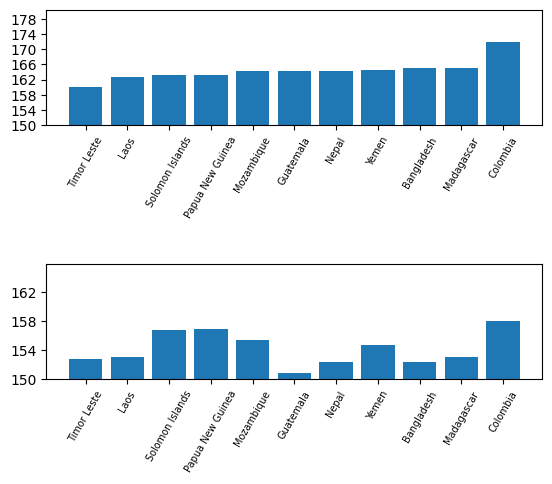

In [10]:
alturas
alturas_new = alturas.drop(["Girls 19 (in)", "Boys 19 (in)"], axis = 1)
alturas_new
alturas_up_M = alturas_new.sort_values("Average Height, Boys, 19 yo (cm)")
alturas_up_M = alturas_up_M[["Country","Average Height, Boys, 19 yo (cm)", "Girls 19 (cm)"]].head(10)
colombia_row = alturas_new[alturas_new['Country'] == 'Colombia']
alturas_up_M = pd.concat([alturas_up_M, colombia_row])
fig, axs = plt.subplots(2, 1)
axs[0].bar(alturas_up_M['Country'], alturas_up_M['Average Height, Boys, 19 yo (cm)'])
axs[0].tick_params(axis='x', labelsize=7, labelrotation=60)
axs[0].set_ylim(ymin=160)
axs[0].set_yticks(np.arange(150, 180, 4))
plt.subplots_adjust(hspace=1.2, wspace=0.3)

#Altura de mujeres
axs[1].bar(alturas_up_M['Country'], alturas_up_M['Girls 19 (cm)'])
axs[1].tick_params(axis='x', labelsize=7, labelrotation=60)
axs[1].set_ylim(ymin=160)
axs[1].set_yticks(np.arange(150, 165, 4))


plt.show()

([<matplotlib.axis.XTick at 0x7e5a1f164dc0>,
 [Text(180.0, 0, '180.0'),
  Text(180.3, 0, '180.3'),
  Text(180.60000000000002, 0, '180.6'),
  Text(180.90000000000003, 0, '180.9'),
  Text(181.20000000000005, 0, '181.2'),
  Text(181.50000000000006, 0, '181.5'),
  Text(181.80000000000007, 0, '181.8'),
  Text(182.10000000000008, 0, '182.1'),
  Text(182.4000000000001, 0, '182.4'),
  Text(182.7000000000001, 0, '182.7'),
  Text(183.0000000000001, 0, '183.0'),
  Text(183.30000000000013, 0, '183.3'),
  Text(183.60000000000014, 0, '183.6'),
  Text(183.90000000000015, 0, '183.9')])

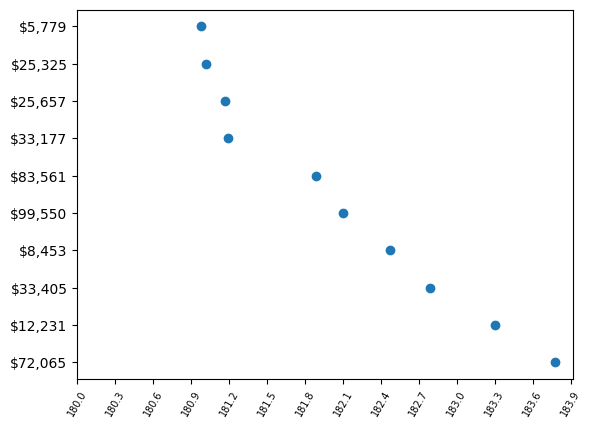

In [50]:
income_altura = pd.merge(income,alturas_new, on="Country" )
income_altura = income_altura[["GDP per Adult (USD)", "Average Height, Boys, 19 yo (cm)", "Girls 19 (cm)"]]
income_altura = income_altura.sort_values("Average Height, Boys, 19 yo (cm)", ascending=False ).head(10)
income_altura = income_altura.reset_index(drop=True)
plt.scatter(income_altura["Average Height, Boys, 19 yo (cm)"], income_altura["GDP per Adult (USD)"])
plt.tick_params(axis='x', labelsize=7, labelrotation=60)
plt.xticks(np.arange(180, 184, 0.3))


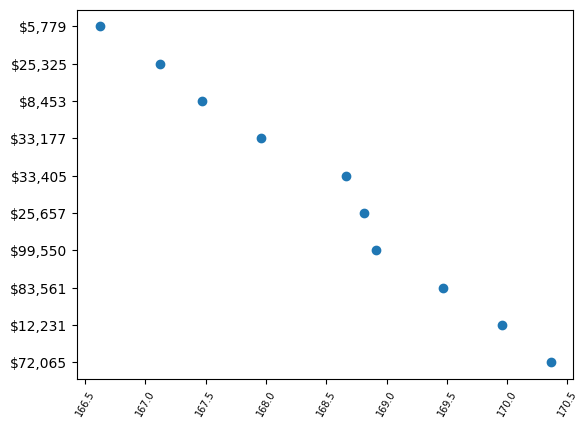

In [51]:
#relacionamos el GDP con la altura de las mujeres
income_altura = income_altura[["GDP per Adult (USD)", "Average Height, Boys, 19 yo (cm)", "Girls 19 (cm)"]]
income_altura = income_altura.sort_values("Girls 19 (cm)", ascending=False ).head(10)
income_altura = income_altura.reset_index(drop=True)
plt.scatter(income_altura["Girls 19 (cm)"], income_altura["GDP per Adult (USD)"])
plt.tick_params(axis='x', labelsize=7, labelrotation=60)
#plt.xticks(np.arange(180, 184, 0.3))

([<matplotlib.axis.XTick at 0x7e5a21a229e0>,
 [Text(160.0, 0, '160.0'),
  Text(160.3, 0, '160.3'),
  Text(160.60000000000002, 0, '160.6'),
  Text(160.90000000000003, 0, '160.9'),
  Text(161.20000000000005, 0, '161.2'),
  Text(161.50000000000006, 0, '161.5'),
  Text(161.80000000000007, 0, '161.8'),
  Text(162.10000000000008, 0, '162.1'),
  Text(162.4000000000001, 0, '162.4'),
  Text(162.7000000000001, 0, '162.7'),
  Text(163.0000000000001, 0, '163.0'),
  Text(163.30000000000013, 0, '163.3'),
  Text(163.60000000000014, 0, '163.6'),
  Text(163.90000000000015, 0, '163.9'),
  Text(164.20000000000016, 0, '164.2'),
  Text(164.50000000000017, 0, '164.5'),
  Text(164.80000000000018, 0, '164.8'),
  Text(165.1000000000002, 0, '165.1'),
  Text(165.4000000000002, 0, '165.4'),
  Text(165.70000000000022, 0, '165.7'),
  Text(166.00000000000023, 0, '166.0'),
  Text(166.30000000000024, 0, '166.3'),
  Text(166.60000000000025, 0, '166.6'),
  Text(166.90000000000026, 0, '166.9')])

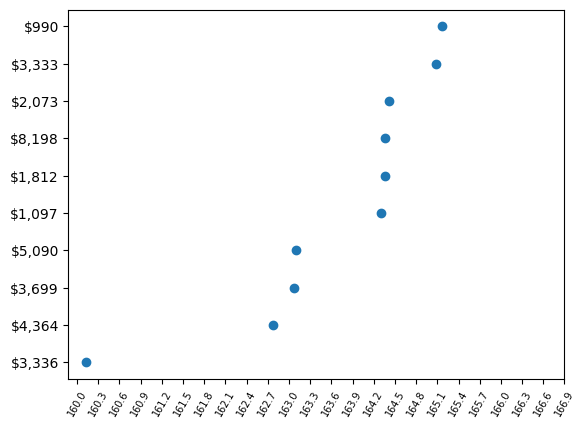

In [54]:
income_altura = pd.merge(income,alturas_new, on="Country" )
income_altura = income_altura[["GDP per Adult (USD)", "Average Height, Boys, 19 yo (cm)", "Girls 19 (cm)"]]
income_altura = income_altura.sort_values("Average Height, Boys, 19 yo (cm)").head(10)
income_altura = income_altura.reset_index(drop=True)
plt.scatter(income_altura["Average Height, Boys, 19 yo (cm)"], income_altura["GDP per Adult (USD)"])
plt.tick_params(axis='x', labelsize=7, labelrotation=60)
plt.xticks(np.arange(160, 167, 0.3))

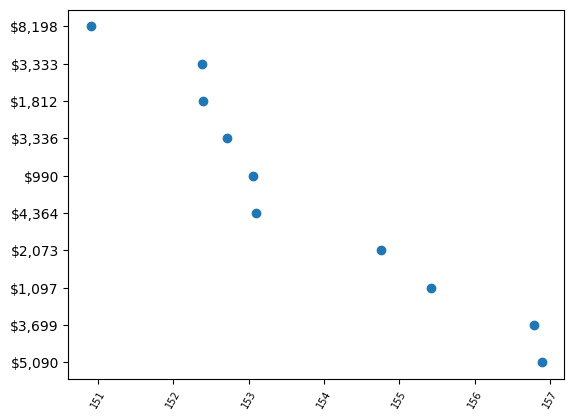

In [55]:
#relacionamos el GDP con la altura de las mujeres
income_altura = income_altura[["GDP per Adult (USD)", "Average Height, Boys, 19 yo (cm)", "Girls 19 (cm)"]]
income_altura = income_altura.sort_values("Girls 19 (cm)", ascending=False ).head(10)
income_altura = income_altura.reset_index(drop=True)
plt.scatter(income_altura["Girls 19 (cm)"], income_altura["GDP per Adult (USD)"])
plt.tick_params(axis='x', labelsize=7, labelrotation=60)
#plt.xticks(np.arange(180, 184, 0.3))

In [ ]:
#Vemos que no hay una relación clara entre la altura y el GDP para los 10 países con mayor altura y menor altura, ya que varían mucho los ingresos
#Sin embargo en el plano general de las cosas, los países con menor altura tienden a tener un mucho menor GDP que los que tienen una mayor altura